In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
heart = pd.read_csv("heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart.shape

(1025, 14)

In [6]:
heart1 = heart.drop_duplicates(ignore_index = True)
heart1.shape

(302, 14)

In [7]:
heart1.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
293,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
294,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
295,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
296,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
301,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
# Putting feature variable to X
X = heart1.drop('target',axis=1)

# Putting response variable to y
y = heart1['target']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((211, 13), (91, 13))

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

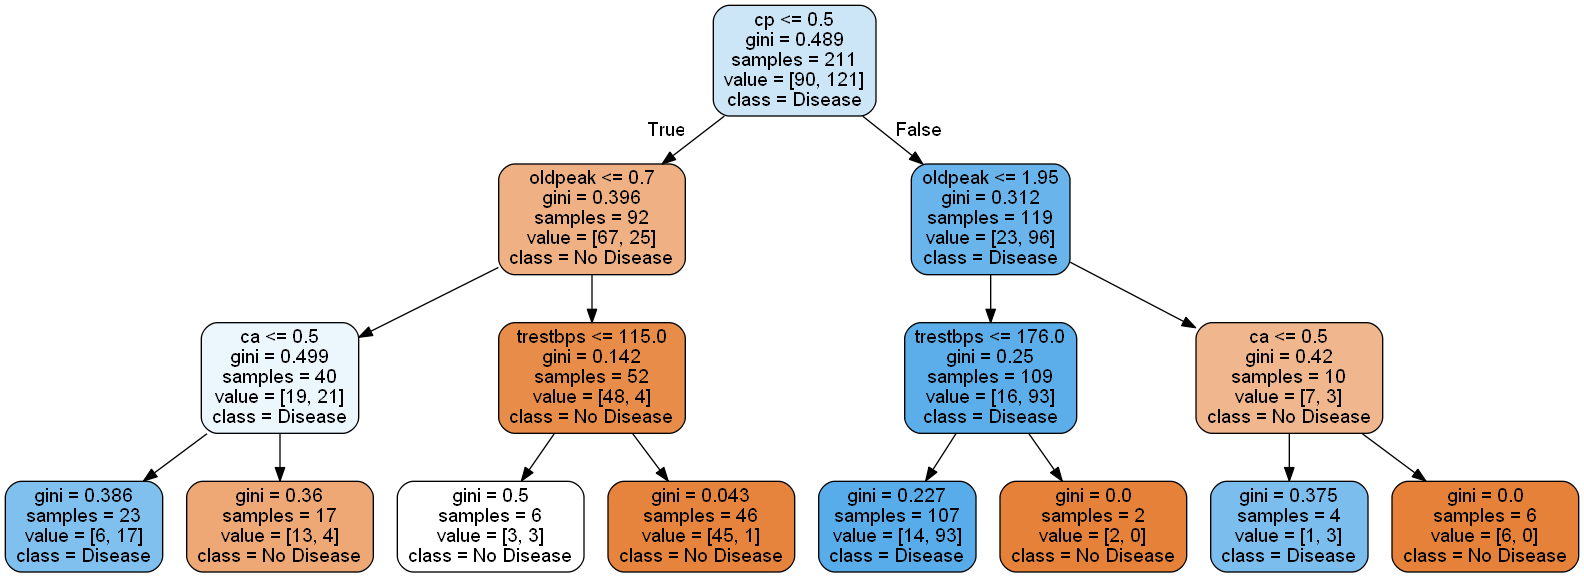

In [14]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")